___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [2]:
# streamlit ile bir türlü çalıştıramadığımdan, nedenini araştırdım. Hatanın nedeninin Python versionu olabileceği yazıyordu. O nedenle python versiyonunu güncelledim. 
# bu sefer ipykernel hatası verdi. onu güncelledim. bu sefer ilk satır dahi çalışmadı. modülleri tanımadı. onları yükledim.

In [11]:
# pip install pandas       

In [12]:
# pip install matplotlib 

In [15]:
# pip install seaborn

In [17]:
# pip install sklearn

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [4]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [6]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000
mean,18024.380584,32089.995708,5.937355,1.389695,1.042853,88.499340,0.247063,1428.661891,1337.700534,4.832124
std,7381.679318,36977.214964,0.704772,1.121306,0.339178,26.674341,0.431317,275.804272,199.682385,0.867530
min,4950.000000,0.000000,5.000000,0.000000,0.000000,40.000000,0.000000,890.000000,840.000000,3.000000
25%,12850.000000,1920.500000,5.000000,0.000000,1.000000,66.000000,0.000000,1229.000000,1165.000000,4.100000
50%,16900.000000,20413.000000,6.000000,1.000000,1.000000,85.000000,0.000000,1461.000000,1295.000000,4.800000
75%,21900.000000,46900.000000,6.000000,2.000000,1.000000,103.000000,0.000000,1598.000000,1472.000000,5.400000
max,74600.000000,317000.000000,8.000000,3.000000,4.000000,294.000000,1.000000,2967.000000,2471.000000,9.100000


In [7]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

In [8]:
df.make_model

0               Audi A1
1               Audi A1
2               Audi A1
3               Audi A1
4               Audi A1
              ...      
15910    Renault Espace
15911    Renault Espace
15912    Renault Espace
15913    Renault Espace
15914    Renault Espace
Name: make_model, Length: 15915, dtype: object

In [9]:
df2 = df.copy()

## Feature Engineering

In [10]:
df_object = df.select_dtypes(include ="object").head()
df_object

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


In [11]:
for col in df_object:
    print(f"{col:<20}:", df[col].nunique())

make_model          : 9
body_type           : 8
vat                 : 2
Type                : 5
Fuel                : 4
Comfort_Convenience : 6196
Entertainment_Media : 346
Extras              : 659
Safety_Security     : 4442
Paint_Type          : 3
Upholstery_type     : 2
Gearing_Type        : 3
Drive_chain         : 3


In [12]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

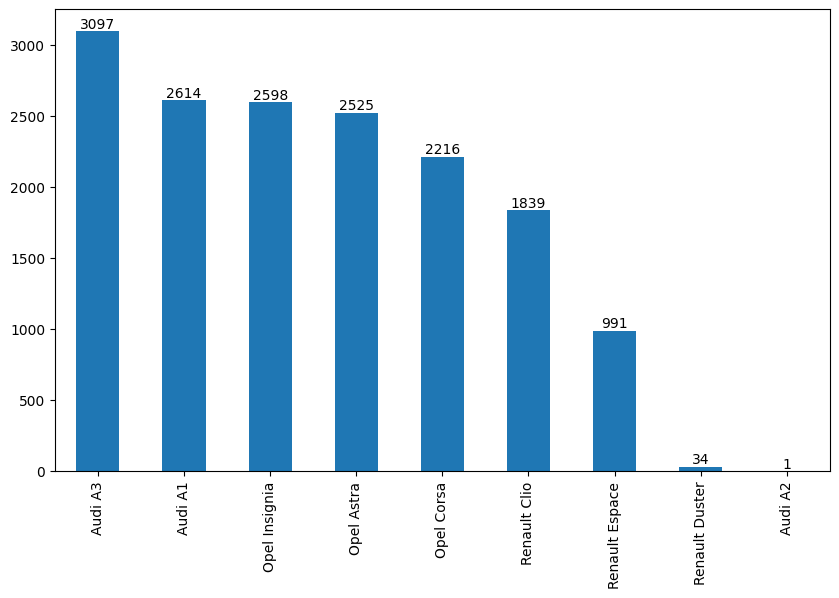

In [13]:
ax = df.make_model.value_counts().plot(kind ="bar")

ax.bar_label(ax.containers[0]);

In [14]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.0,Employee's car,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.0,1.0,85.0,0,Metallic,Cloth,Manual,1598.0,1135.0,front,4.9


In [15]:
df.drop(index=[2614], inplace =True)

In [16]:
df.shape

(15914, 23)

<AxesSubplot: xlabel='price', ylabel='Count'>

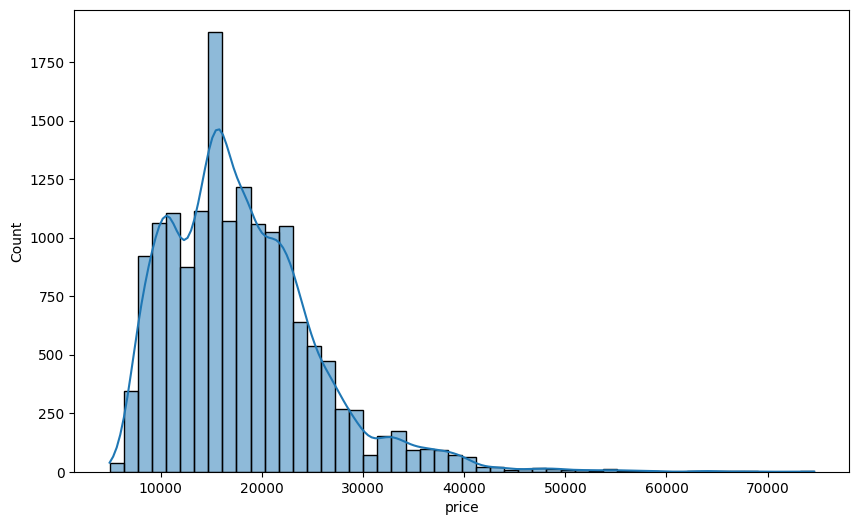

In [17]:
sns.histplot(df.price, bins=50, kde=True)

In [18]:
skew(df.price)

1.236330745564795

In [19]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
0,15770,56013.000000,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8
1,14500,80000.000000,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6
2,14640,83450.000000,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8
3,14500,73000.000000,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8
4,16790,16200.000000,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1
...,...,...,...,...,...,...,...,...,...,...
15910,39950,1647.362609,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3
15911,39885,9900.000000,7.0,0.0,1.0,165.0,0,1798.0,1708.0,7.4
15912,39875,15.000000,6.0,0.0,1.0,146.0,1,1997.0,1734.0,5.3
15913,39700,10.000000,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3


<AxesSubplot: >

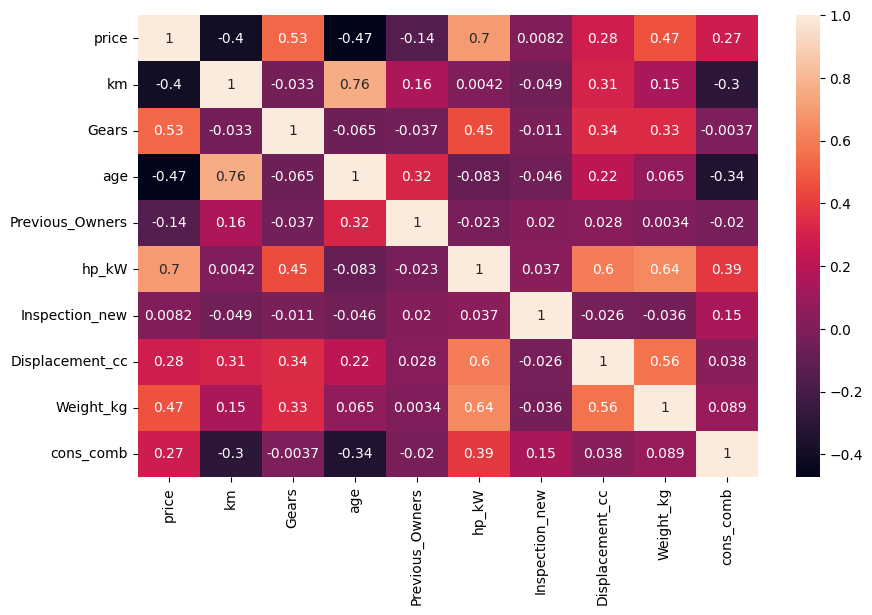

In [20]:
sns.heatmap(df_numeric.corr(), annot =True)

## multicollinearity control

In [21]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [22]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

False

<AxesSubplot: >

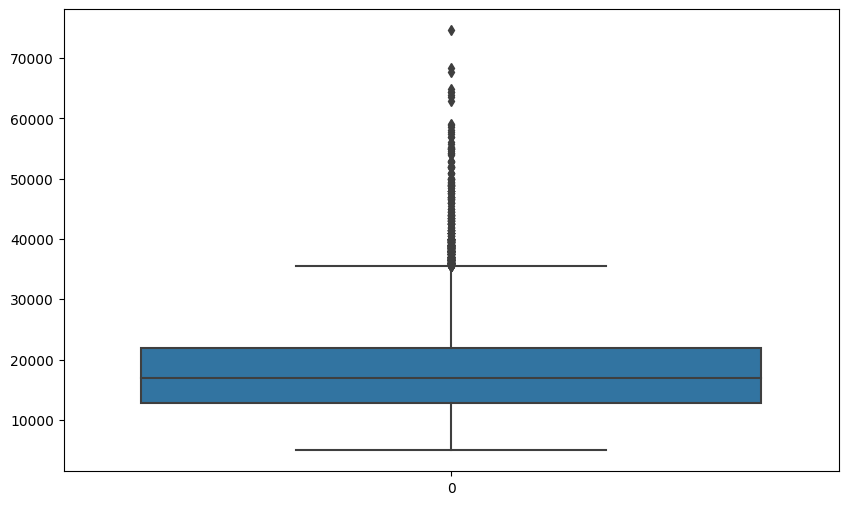

In [23]:
sns.boxplot(df.price)

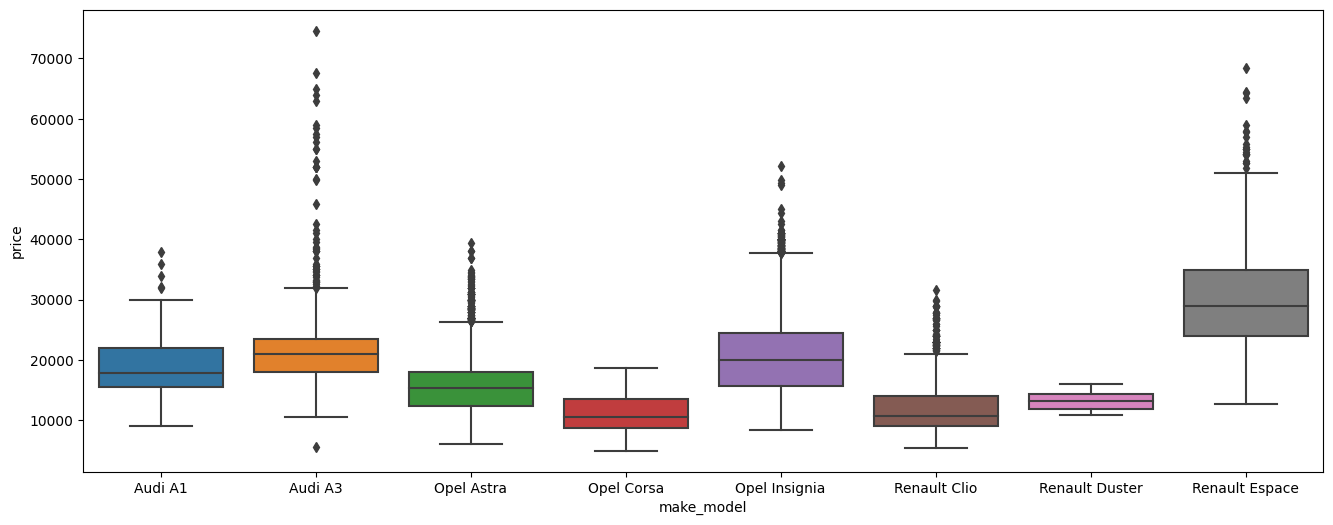

In [24]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=1.5)
plt.show()

In [25]:
df[df["make_model"]== "Audi A1"]["price"]

0       15770
1       14500
2       14640
3       14500
4       16790
        ...  
2609    21800
2610    21789
2611    21750
2612    21760
2613    21750
Name: price, Length: 2614, dtype: int64

In [26]:
total_outliers = []

for model in df.make_model.unique():
    
    car_prices = df[df["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A3         : 54   ,           The rate of outliers : 0.017
 The count of outlier for Opel Astra      : 134  ,           The rate of outliers : 0.053
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 114  ,           The rate of outliers : 0.044
 The count of outlier for Renault Clio    : 90   ,           The rate of outliers : 0.049
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 22   ,           The rate of outliers : 0.022

Total_outliers :  419 The rate of total outliers : 0.026


## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [27]:
X= df.drop(columns="price")
y= df.price

In [28]:
def trans_1(X, y, test_size = 0.2, random_state=101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    X_train = X_train.join(X_train["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
    X_train = X_train.join(X_train["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
    X_train = X_train.join(X_train["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
    X_train = X_train.join(X_train["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))
    
    
    X_test = X_test.join(X_test["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
    X_test = X_test.join(X_test["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
    X_test = X_test.join(X_test["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
    X_test = X_test.join(X_test["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))
    
    X_test = X_test.reindex(columns = X_train.columns, fill_value=0) # "0"
    
    
    X_train.drop(columns=["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], inplace = True)
    X_test.drop(columns=["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], inplace = True)
    
    
    return X_train, X_test, y_train, y_test

### Example for reindex

In [29]:
train = {"a": [1, 2], "b": [2,3], "c":[1,4], "d":[2,4], "e":[5,6]}
test = {"e": [1, 2], "c": [2,3], "a":[1,4], "d":[2,4]}
train = pd.DataFrame(train)
test = pd.DataFrame(test)
train

,a,b,c,d,e
0,1,2,1,2,5
1,2,3,4,4,6


In [30]:
test

,e,c,a,d
0,1,2,1,2
1,2,3,4,4


In [31]:
test.reindex(columns = train.columns, fill_value=0)

,a,b,c,d,e
0,1,0,2,2,1
1,4,0,3,4,2


In [32]:
X_train, X_test, y_train, y_test = trans_1(X, y)

In [33]:
X_train.head()

,make_model,body_type,vat,km,Type,Fuel,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
11613,Opel Insignia,Station wagon,VAT deductible,79640.0,Used,Diesel,6.0,2.0,1.0,125.0,0,Metallic,Cloth,Manual,1956.0,1733.0,front,4.5,1,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1
9040,Opel Corsa,Sedans,VAT deductible,129617.0,Used,Diesel,5.0,3.0,1.0,55.0,0,Metallic,Cloth,Manual,1398.0,1163.0,front,5.3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11639,Opel Insignia,Sedans,VAT deductible,16300.0,Used,Diesel,6.0,2.0,1.0,100.0,1,Metallic,Cloth,Manual,1598.0,1503.0,front,4.2,1,0,1,0,0,1,0,0,1,1,0,0,1,1,1,0,1,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,0,0
7602,Opel Astra,Station wagon,VAT deductible,10350.0,Demonstration,Diesel,6.0,0.0,1.0,100.0,1,Metallic,Part/Full Leather,Automatic,1598.0,1536.0,front,5.1,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,1,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0
4210,Audi A3,Station wagon,VAT deductible,26450.0,Used,Diesel,6.0,2.0,1.0,81.0,0,Metallic,Cloth,Manual,1598.0,1365.0,front,4.0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1


In [34]:
X_test.head()

,make_model,body_type,vat,km,Type,Fuel,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
15079,Renault Espace,Van,VAT deductible,49606.0,Used,Benzine,6.0,2.0,2.0,147.0,0,Metallic,Cloth,Automatic,1618.0,1734.0,front,6.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,0,1,1,1,0
13097,Renault Clio,Compact,VAT deductible,100.0,New,Benzine,6.0,1.0,1.0,88.0,1,Metallic,Cloth,Automatic,1197.0,1087.0,front,5.4,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11349,Opel Insignia,Sedans,VAT deductible,11000.0,Used,Benzine,6.0,1.0,1.0,121.0,1,Metallic,Cloth,Automatic,1490.0,1503.0,front,6.0,1,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0,1
2668,Audi A3,Sedans,VAT deductible,58000.0,Used,Diesel,7.0,3.0,1.0,81.0,0,Metallic,Cloth,Automatic,1598.0,1365.0,front,3.7,1,0,1,1,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,0,0,1,1,0,1,1,1,0,1
12668,Opel Insignia,Station wagon,VAT deductible,7.0,New,Benzine,6.0,0.0,1.0,121.0,0,Uni/basic,Cloth,Automatic,1490.0,1522.0,front,6.5,1,0,1,1,0,1,0,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1


## OneHotEncoder

### Example

In [35]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

In [36]:
data =pd.DataFrame(pd.Series(['good','bad','worst','good', 'good', 'bad', 'bed']))
# new_data has two values that data does not have. 
new_data= pd.DataFrame(pd.Series(['bad','worst','good', 'good', 'bad', "bed", "resume", "car"]))

In [37]:
data

,0
0,good
1,bad
2,worst
3,good
4,good
5,bad
6,bed


In [38]:
new_data

,0
0,bad
1,worst
2,good
3,good
4,bad
5,bed
6,resume
7,car


In [39]:
enc.fit_transform(data[[0]])

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [40]:
enc.transform(new_data[[0]])

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [41]:
# pip install -U scikit-learn

In [42]:
# print(sklearn.__version__)

In [43]:
# 'OneHotEncoder' object has no attribute 'get_feature_names_out' hatası aldım. 
# sklearn version update için üstteki kodu çalıştırdım.

In [44]:
enc.get_feature_names_out(["0"])

array(['0_bad', '0_bed', '0_good', '0_worst'], dtype=object)

In [45]:
pd.DataFrame(enc.fit_transform(data[[0]]), columns = enc.get_feature_names_out(["0"]))

,0_bad,0_bed,0_good,0_worst
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0


In [46]:
pd.DataFrame(enc.transform(new_data[[0]]), columns = enc.get_feature_names_out(["0"]))

,0_bad,0_bed,0_good,0_worst
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0


### OneHotEncoder for X_train and X_test

In [47]:
cat = X_train.select_dtypes("object").columns
cat

Index(['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')

In [48]:
cat = list(cat)
cat

['make_model',
 'body_type',
 'vat',
 'Type',
 'Fuel',
 'Paint_Type',
 'Upholstery_type',
 'Gearing_Type',
 'Drive_chain']

In [49]:
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, 
                           columns = enc.get_feature_names_out(cat))

In [50]:
enc.fit_transform(X_train[cat])

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [51]:
enc.get_feature_names_out(cat)

array(['make_model_Audi A1', 'make_model_Audi A3',
       'make_model_Opel Astra', 'make_model_Opel Corsa',
       'make_model_Opel Insignia', 'make_model_Renault Clio',
       'make_model_Renault Duster', 'make_model_Renault Espace',
       'body_type_Compact', 'body_type_Convertible', 'body_type_Coupe',
       'body_type_Off-Road', 'body_type_Sedans',
       'body_type_Station wagon', 'body_type_Transporter',
       'body_type_Van', 'vat_Price negotiable', 'vat_VAT deductible',
       'Type_Demonstration', "Type_Employee's car", 'Type_New',
       'Type_Pre-registered', 'Type_Used', 'Fuel_Benzine', 'Fuel_Diesel',
       'Fuel_Electric', 'Fuel_LPG/CNG', 'Paint_Type_Metallic',
       'Paint_Type_Perl effect', 'Paint_Type_Uni/basic',
       'Upholstery_type_Cloth', 'Upholstery_type_Part/Full Leather',
       'Gearing_Type_Automatic', 'Gearing_Type_Manual',
       'Gearing_Type_Semi-automatic', 'Drive_chain_4WD',
       'Drive_chain_front', 'Drive_chain_rear'], dtype=object)

In [52]:
X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, 
                           columns = enc.get_feature_names_out(cat))
X_train_cat

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
11613,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9040,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11639,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7602,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4210,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5696,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8007,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1361,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1547,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [53]:
X_train.select_dtypes("number")

,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
11613,79640.000000,6.0,2.0,1.0,125.0,0,1956.0,1733.0,4.5,1,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1
9040,129617.000000,5.0,3.0,1.0,55.0,0,1398.0,1163.0,5.3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11639,16300.000000,6.0,2.0,1.0,100.0,1,1598.0,1503.0,4.2,1,0,1,0,0,1,0,0,1,1,0,0,1,1,1,0,1,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,0,0
7602,10350.000000,6.0,0.0,1.0,100.0,1,1598.0,1536.0,5.1,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,1,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0
4210,26450.000000,6.0,2.0,1.0,81.0,0,1598.0,1365.0,4.0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5696,1647.362609,6.0,0.0,1.0,85.0,0,999.0,1180.0,4.6,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1
8007,1647.362609,6.0,0.0,1.0,78.0,0,999.0,1273.0,4.9,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,

In [54]:
X_train_new = X_train_cat.join(X_train.select_dtypes("number"))
X_train_new

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
11613,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,79640.000000,6.0,2.0,1.0,125.0,0,1956.0,1733.0,4.5,1,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1
9040,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,129617.000000,5.0,3.0,1.0,55.0,0,1398.0,1163.0,5.3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11639,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,16300.000000,6.0,2.0,1.0,100.0,1,1598.0,1503.0,4.2,1,0,1,0,0,1,0,0,1,1,0,0,1,1,1,0,1,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,0,0
7602,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [55]:
X_train_new

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
11613,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,79640.000000,6.0,2.0,1.0,125.0,0,1956.0,1733.0,4.5,1,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1
9040,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,129617.000000,5.0,3.0,1.0,55.0,0,1398.0,1163.0,5.3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11639,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,16300.000000,6.0,2.0,1.0,100.0,1,1598.0,1503.0,4.2,1,0,1,0,0,1,0,0,1,1,0,0,1,1,1,0,1,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,0,0
7602,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [56]:
X_test_cat = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, columns = enc.get_feature_names_out(cat))
X_test_cat

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
15079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13097,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
11349,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2668,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12668,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10336,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
12699,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7491,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4945,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [57]:
X_test.select_dtypes("number")

,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
15079,49606.0,6.0,2.0,2.0,147.0,0,1618.0,1734.0,6.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,0,1,1,1,0
13097,100.0,6.0,1.0,1.0,88.0,1,1197.0,1087.0,5.4,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11349,11000.0,6.0,1.0,1.0,121.0,1,1490.0,1503.0,6.0,1,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0,1
2668,58000.0,7.0,3.0,1.0,81.0,0,1598.0,1365.0,3.7,1,0,1,1,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,0,0,1,1,0,1,1,1,0,1
12668,7.0,6.0,0.0,1.0,121.0,0,1490.0,1522.0,6.5,1,0,1,1,0,1,0,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10336,3500.0,5.0,0.0,1.0,66.0,0,1398.0,1163.0,5.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
12699,1.0,6.0,0.0,0.0,122.0,0,1490.0,1487.0,6.2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [58]:
X_test_new = X_test_cat.join(X_test.select_dtypes("number"))
X_test_new

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
15079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49606.0,6.0,2.0,2.0,147.0,0,1618.0,1734.0,6.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,0,1,1,1,0
13097,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,100.0,6.0,1.0,1.0,88.0,1,1197.0,1087.0,5.4,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11349,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,11000.0,6.0,1.0,1.0,121.0,1,1490.0,1503.0,6.0,1,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0,1
2668,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.

In [59]:
X_test_new

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
15079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49606.0,6.0,2.0,2.0,147.0,0,1618.0,1734.0,6.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,0,1,1,1,0
13097,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,100.0,6.0,1.0,1.0,88.0,1,1197.0,1087.0,5.4,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11349,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,11000.0,6.0,1.0,1.0,121.0,1,1490.0,1503.0,6.0,1,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0,1
2668,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.

In [60]:
def trans_2(X_train, X_test):
    
    cat = X_train.select_dtypes("object").columns
    cat = list(cat)
    
    enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, 
                           columns = enc.get_feature_names_out(cat))
    
    X_test_cat  = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, 
                               columns = enc.get_feature_names_out(cat))
    
    X_train = X_train_cat.join(X_train.select_dtypes("number"))
    X_test = X_test_cat.join(X_test.select_dtypes("number"))
    
    
    return X_train, X_test

In [61]:
X_train, X_test = trans_2(X_train, X_test)

In [62]:
X_train.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
11613,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,79640.0,6.0,2.0,1.0,125.0,0,1956.0,1733.0,4.5,1,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1
9040,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,129617.0,5.0,3.0,1.0,55.0,0,1398.0,1163.0,5.3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11639,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,16300.0,6.0,2.0,1.0,100.0,1,1598.0,1503.0,4.2,1,0,1,0,0,1,0,0,1,1,0,0,1,1,1,0,1,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,0,0
7602,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

In [63]:
X_test.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
15079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49606.0,6.0,2.0,2.0,147.0,0,1618.0,1734.0,6.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,0,1,1,1,0
13097,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,100.0,6.0,1.0,1.0,88.0,1,1197.0,1087.0,5.4,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
11349,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,11000.0,6.0,1.0,1.0,121.0,1,1490.0,1503.0,6.0,1,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0,1
2668,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.

In [64]:
corr_by_price = X_train.join(y_train).corr()["price"].sort_values()[:-1]
corr_by_price

age                                        -0.477765
Gearing_Type_Manual                        -0.433410
km                                         -0.403698
Upholstery_type_Cloth                      -0.388221
make_model_Opel Corsa                      -0.379441
Type_Used                                  -0.371525
make_model_Renault Clio                    -0.295466
body_type_Compact                          -0.195581
Drive_chain_front                          -0.159735
Previous_Owners                            -0.145381
make_model_Opel Astra                      -0.130055
em_CD player                               -0.094472
vat_Price negotiable                       -0.092587
em_On-board computer                       -0.077986
ss_Central door lock with remote control   -0.071701
ss_Fog lights                              -0.054712
Paint_Type_Perl effect                     -0.049374
body_type_Sedans                           -0.049268
ss_Central door lock                       -0.

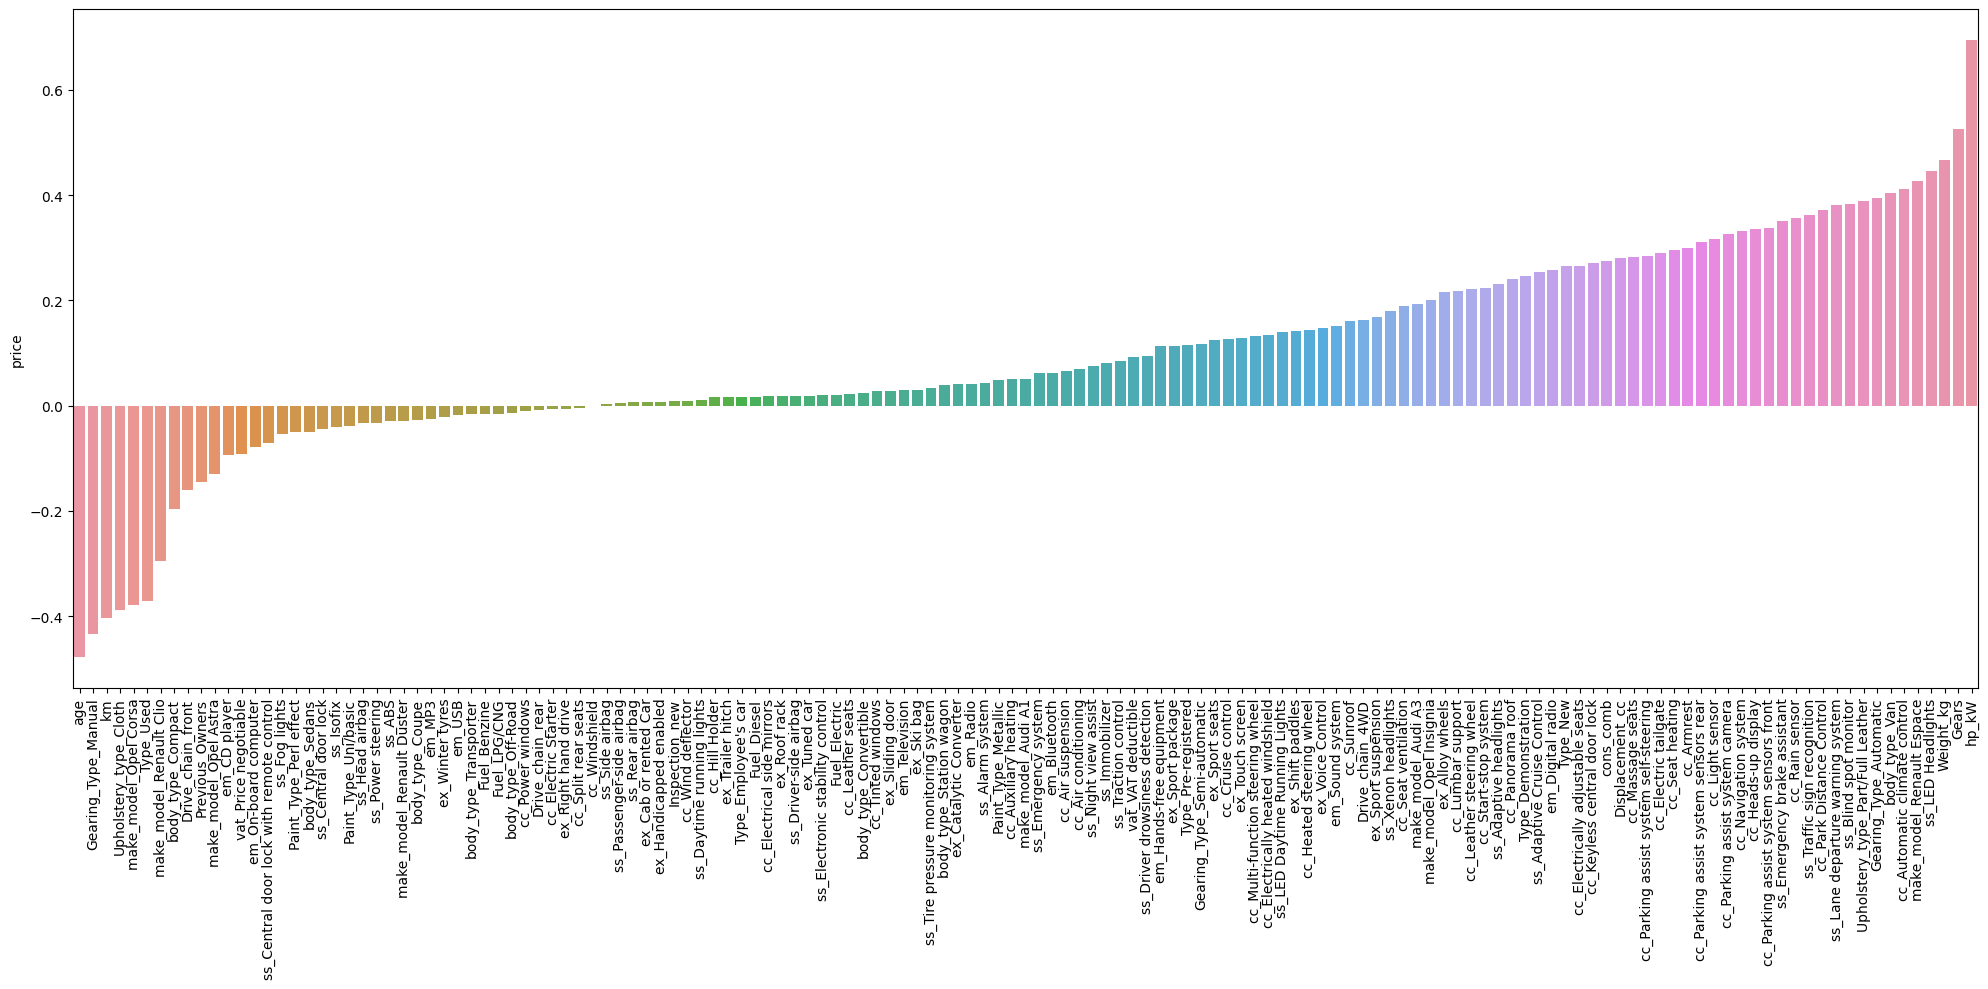

In [65]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [66]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [67]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [68]:
pd.options.display.float_format = '{:.3f}'.format

In [69]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.890,0.890
mae,1705.452,1705.217
mse,6038122.231,5785150.711
rmse,2457.259,2405.234


## Adjusted R2 Score

In [70]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [71]:
y_pred = lm.predict(X_test)

In [72]:
adj_r2(y_test, y_pred, X)

0.8903421031387483

## Cross Validate

In [73]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)

In [74]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.287,0.010,0.888,-1671.830,-5420159.539,-2328.124
1,0.322,0.012,0.884,-1776.092,-6233479.552,-2496.694
2,0.347,0.010,0.889,-1740.004,-6098855.314,-2469.586
3,0.409,0.010,0.883,-1737.451,-6941969.198,-2634.762
4,0.296,0.006,0.890,-1737.987,-6466406.057,-2542.913
5,0.320,0.008,0.886,-1724.793,-6485424.921,-2546.650
6,0.309,0.011,0.886,-1733.664,-5886688.695,-2426.250
7,0.267,0.009,0.901,-1680.942,-5563552.893,-2358.718
8,0.281,0.012,0.874,-1755.679,-7249552.942,-2692.499
9,0.326,0.007,0.881,-1740.354,-6140768.568,-2478.057


In [75]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                   0.886
test_neg_mean_absolute_error          -1729.880
test_neg_mean_squared_error        -6248685.768
test_neg_root_mean_squared_error      -2497.425
dtype: float64

In [76]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.890,0.890
mae,1705.452,1705.217
mse,6038122.231,5785150.711
rmse,2457.259,2405.234


In [77]:
2405/df.price.mean()

0.13343511633590033

## Prediction Error

In [80]:
#pip install yellowbrick

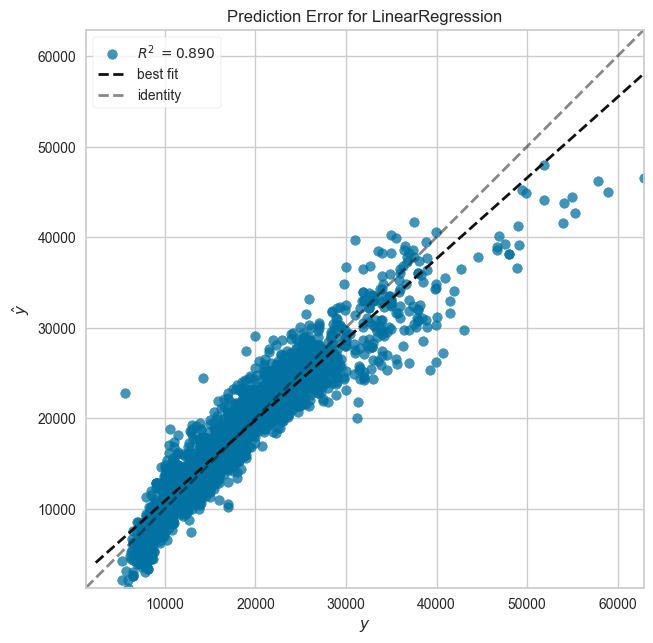

In [81]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

## Residual Plot

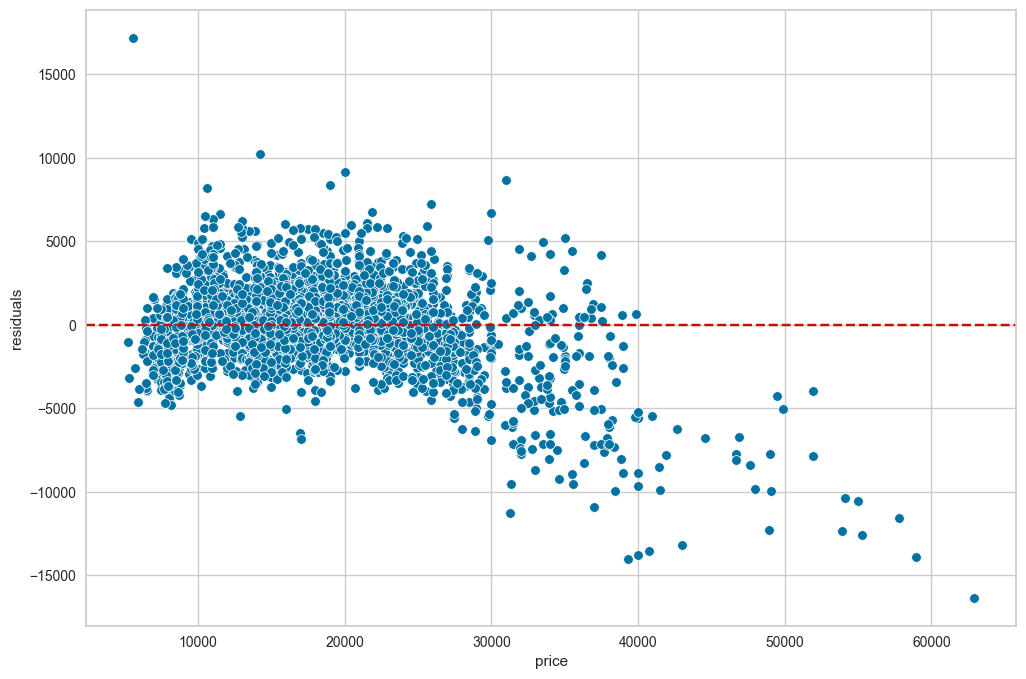

In [82]:
plt.figure(figsize=(12,8))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

<AxesSubplot: xlabel='price', ylabel='Density'>

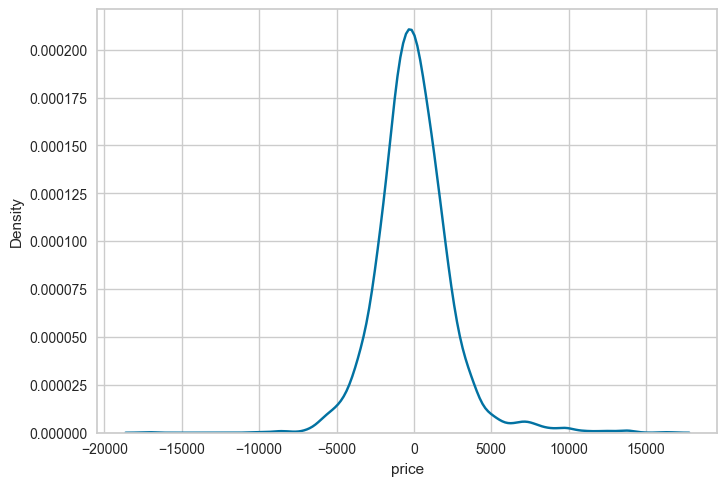

In [83]:
sns.kdeplot(residuals)

In [84]:
skew(residuals)

0.8803469046449564

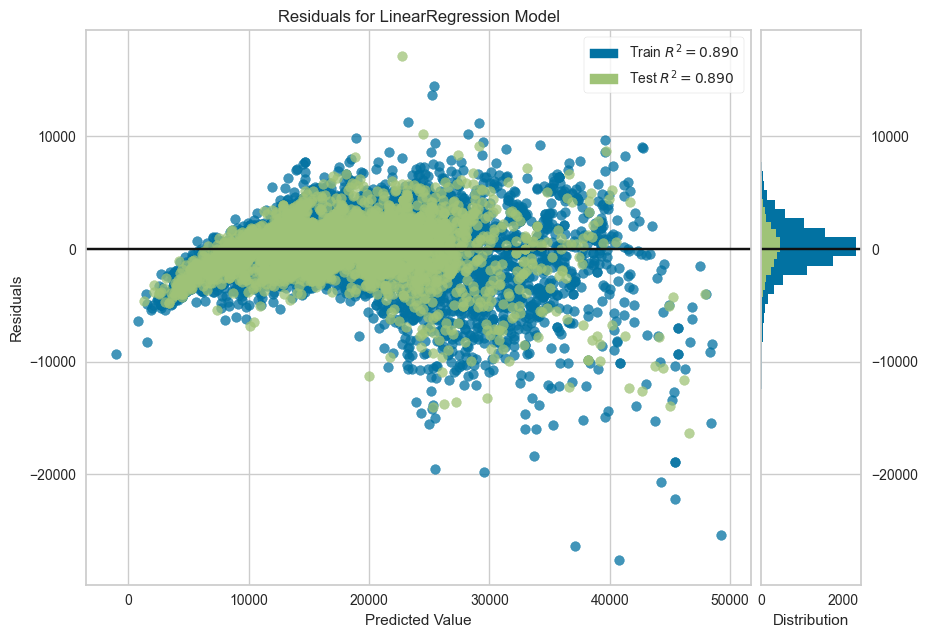

In [85]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();       

## Dropping outliers that worsen my predictions from the dataset

In [86]:
for model in df2.make_model.unique():
    
    car_prices = df2[df2["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR

    drop_index = df2[df2["make_model"]== model][(car_prices < lower_lim) | (car_prices > upper_lim)].index
    df2.drop(index = drop_index, inplace=True)
df2

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,Renault Espace,Van,39950,VAT deductible,1647.363,New,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
15911,Renault Espace,Van,39885,VAT deductible,9900.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400
15912,Renault Espace,Van,39875,VAT deductible,15.000,Pre-registered,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,146.000,1,Metallic,Part/Full Leather,Automatic,1997.000,1734.000,front,5.300
15913,Renault Espace,Van,39700,VAT deductible,10.000,Pre-registered,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300


In [87]:
15496+419

15915

In [88]:
df2[df2.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.000,Employee's car,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.000,1.000,85.000,0,Metallic,Cloth,Manual,1598.000,1135.000,front,4.900


In [89]:
df2.drop(index=[2614], inplace =True)

In [90]:
df2.reset_index(drop=True, inplace=True)

In [91]:
df2

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,Renault Espace,Van,39950,VAT deductible,1647.363,New,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
15491,Renault Espace,Van,39885,VAT deductible,9900.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400
15492,Renault Espace,Van,39875,VAT deductible,15.000,Pre-registered,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,146.000,1,Metallic,Part/Full Leather,Automatic,1997.000,1734.000,front,5.300
15493,Renault Espace,Van,39700,VAT deductible,10.000,Pre-registered,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300


In [92]:
df3 = df2.copy()

In [93]:
X = df2.drop(columns = "price")
y = df2.price

X_train, X_test, y_train, y_test = trans_1(X, y)
X_train, X_test = trans_2(X_train, X_test)

In [94]:
X_train.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
9866,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,10.000,6.000,0.000,1.000,66.000,0,1398.000,1163.000,6.300,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3430,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,54000.000,7.000,3.000,1.000,81.000,0,1598.000,1360.000,3.800,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
3756,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,39246.000,7.000,2.000,1.000,110.000,0,1395

In [95]:
X_test.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
9624,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,24487.000,5.000,1.000,2.000,51.000,0,1229.000,1163.000,5.400,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0
14184,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,500.000,5.000,0.000,2.000,56.000,0,898.000,1165.000,5.000,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0
12919,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,24473.000,6.000,1.000,1.000,87.000,0,119

In [96]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

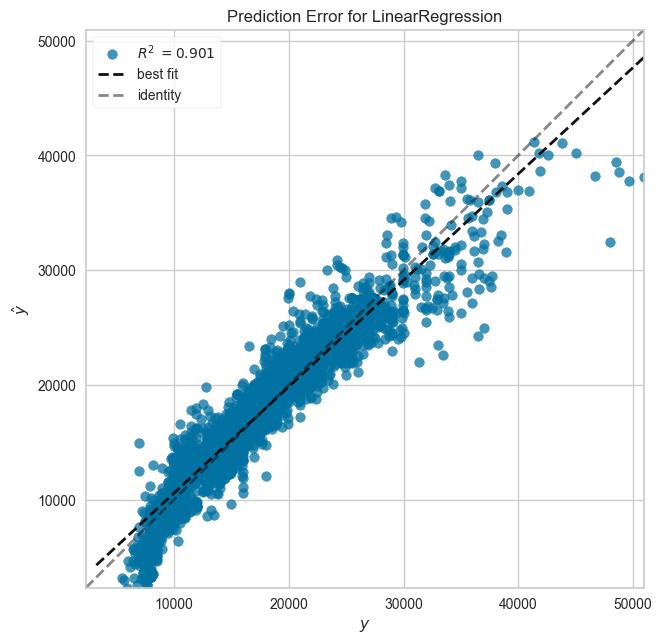

In [97]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

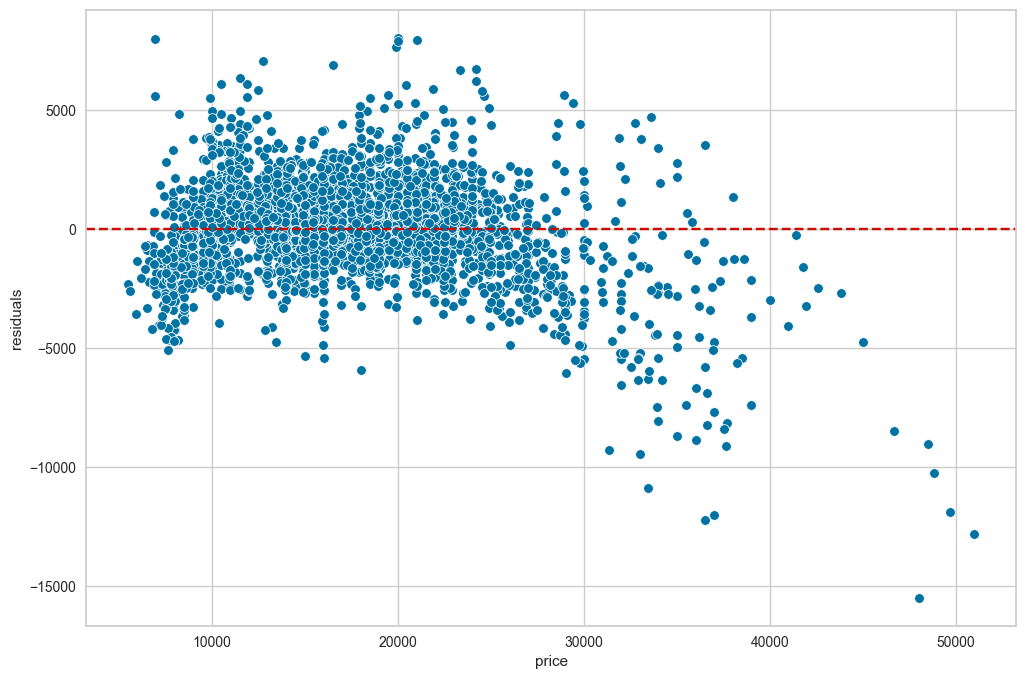

In [98]:
plt.figure(figsize=(12,8))
y_pred = lm2.predict(X_test)
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

In [99]:
train_val(lm2, X_train, y_train, X_test, y_test)

,train,test
R2,0.903,0.901
mae,1518.224,1481.413
mse,4525325.362,4211154.138
rmse,2127.281,2052.110


In [100]:
2052/df2.price.mean()

0.11673441504707019

In [101]:
2405/df.price.mean()

0.13343511633590033

In [102]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [103]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.890,-1559.180,-4658118.105,-2158.267
2,0.905,-1498.636,-4352826.133,-2086.343
3,0.900,-1594.566,-4861445.496,-2204.869
4,0.902,-1517.907,-4708068.296,-2169.808
5,0.887,-1604.840,-5239239.615,-2288.939
6,0.907,-1546.887,-4679325.698,-2163.175
7,0.903,-1470.887,-4297323.973,-2072.999
8,0.902,-1535.402,-4796813.919,-2190.163
9,0.903,-1484.923,-4456407.222,-2111.020
10,0.898,-1578.748,-4599376.962,-2144.616


In [104]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.900
test_neg_mean_absolute_error          -1539.198
test_neg_mean_squared_error        -4664894.542
test_neg_root_mean_squared_error      -2159.020
dtype: float64

In [105]:
train_val(lm2, X_train, y_train, X_test, y_test)

,train,test
R2,0.903,0.901
mae,1518.224,1481.413
mse,4525325.362,4211154.138
rmse,2127.281,2052.110


In [106]:
y_pred = lm2.predict(X_test)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [107]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [108]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
11798,23500,20818.438,2681.562
7,14480,16470.193,-1990.193
11839,22850,23544.997,-694.997
8944,8750,8054.229,695.771
1575,23880,20102.131,3777.869
10635,11500,14775.707,-3275.707
8251,11777,11368.822,408.178
10645,9950,13507.931,-3557.931
13042,11500,12192.654,-692.654
15485,39990,36987.161,3002.839


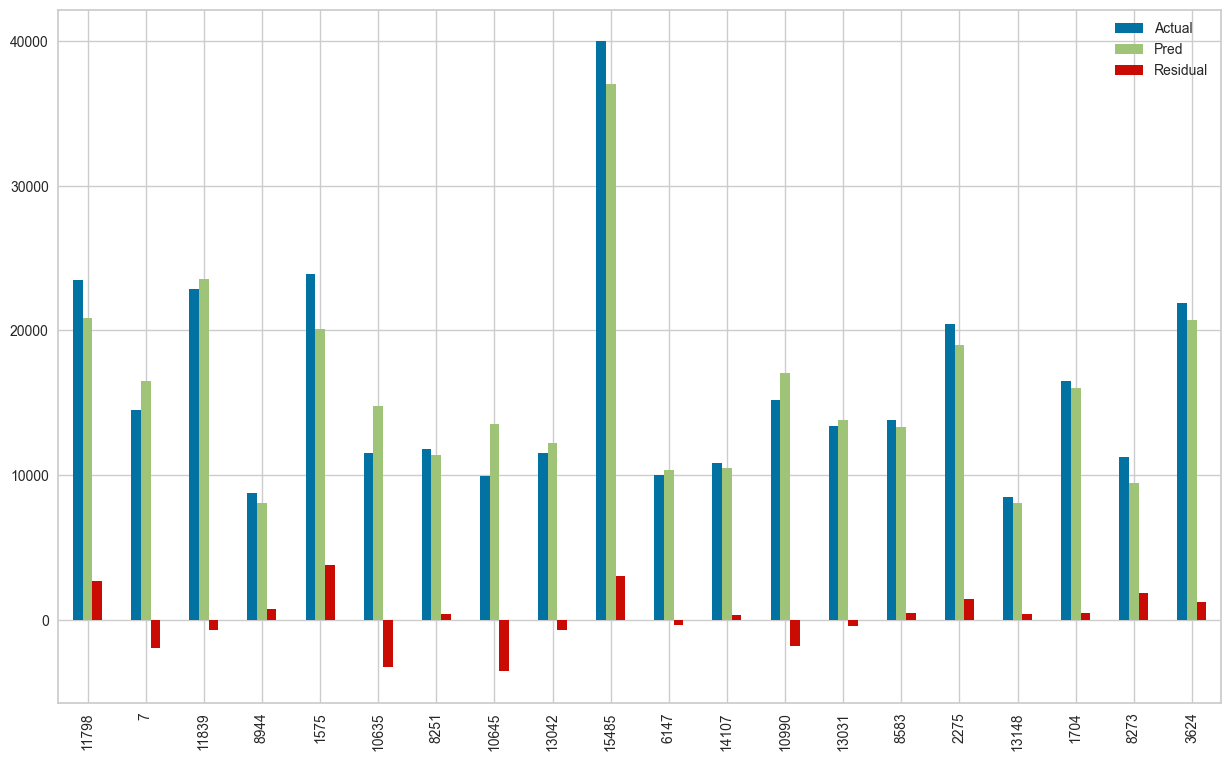

In [109]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

In [110]:
pd.DataFrame(lm2.coef_, index = X_train.columns, columns=["Coef"]).sort_values("Coef")

,Coef
make_model_Renault Duster,-7913.454
make_model_Opel Corsa,-3202.129
make_model_Renault Clio,-3086.559
age,-1606.478
Gearing_Type_Manual,-1557.332
Drive_chain_rear,-1380.531
body_type_Convertible,-1251.405
make_model_Opel Astra,-1241.111
body_type_Transporter,-1112.221
Type_Employee's car,-1037.034


## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Scaling

In [111]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Ridge

In [112]:
from sklearn.linear_model import Ridge

In [113]:
ridge_model = Ridge()

In [114]:
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [115]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.903,0.901
mae,1517.807,1481.156
mse,4526621.303,4208207.883
rmse,2127.586,2051.392


## Cross Validation

In [116]:
model = Ridge()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10)

In [117]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.900
test_neg_mean_absolute_error          -1537.878
test_neg_mean_squared_error        -4661825.627
test_neg_root_mean_squared_error      -2158.291
dtype: float64

## Finding best alpha for Ridge

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [120]:
ridge_model = Ridge()

param_grid = {'alpha':alpha_space}

ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [121]:
ridge_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [122]:
#ridge_grid_model.best_estimator_

In [123]:
ridge_grid_model.best_params_

{'alpha': 1.02}

In [124]:
pd.DataFrame(ridge_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.153,0.035,0.002,0.001,0.010,{'alpha': 0.01},-2158.246,-2086.325,-2204.868,-2169.820,-2288.953,-2163.166,-2072.982,-2190.106,-2111.000,-2144.547,-2159.001,59.404,3
1,0.127,0.022,0.002,0.001,1.020,{'alpha': 1.02},-2156.677,-2085.278,-2205.174,-2171.615,-2290.709,-2162.899,-2072.014,-2186.290,-2110.175,-2142.070,-2158.290,60.059,1
2,0.168,0.032,0.002,0.000,2.030,{'alpha': 2.03},-2155.913,-2085.236,-2205.912,-2173.730,-2292.830,-2163.408,-2071.892,-2184.203,-2110.387,-2142.625,-2158.613,60.540,2
3,0.171,0.023,0.006,0.009,3.040,{'alpha': 3.04},-2155.683,-2085.805,-2206.917,-2175.893,-2295.158,-2164.353,-2072.201,-2182.933,-2111.038,-2144.096,-2159.408,60.947,4
4,0.104,0.020,0.003,0.002,4.050,{'alpha': 4.05},-2155.832,-2086.774,-2208.108,-2178.059,-2297.610,-2165.568,-2072.782,-2182.193,-2111.952,-2145.986,-2160.486,61.310,5
5,0.123,0.028,0.002,0.001,5.060,{'alpha': 5.06},-2156.260,-2088.018,-2209.433,-2180.215,-2300.140,-2166.959,-2073.552,-2181.834,-2113.046,-2148.094,-2161.755,61.645,6
6,0.130,0.029,0.006,0.010,6.070,{'alpha': 6.07},-2156.900,-2089.458,-2210.860,-2182.357,-2302.717,-2168.471,-2074.461,-2181.760,-2114.268,-2150.315,-2163.157,61.958,7
7,0.151,0.035,0.004,0.002,7.080,{'alpha': 7.08},-2157.705,-2091.039,-2212.362,-2184.484,-2305.322,-2170.068,-2075.474,-2181.907,-2115.583,-2152.594,-2164.654,62.256,8
8,0.168,0.024,0.003,0.002,8.090,{'alpha': 8.09},-2158.638,-2092.722,-2213.922,-2186.592,-2307.940,-2171.727,-2076.565,-2182.230,-2116.968,-2154.897,-2166.220,62.540,9
9,0.167,0.034,0.005,0.004,9.100,{'alpha': 9.1},-2159.674,-2094.480,-2215.525,-2188.682,-2310.561,-2173.429,-2077.718,-2182.693,-2118.404,-2157.201,-2167.837,62.815,10


In [125]:
ridge_grid_model.best_index_

1

In [126]:
ridge_grid_model.best_score_

-2158.2902229095735

In [127]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.903,0.901
mae,1517.801,1481.154
mse,4526668.823,4208183.699
rmse,2127.597,2051.386


In [128]:
y_pred = ridge_grid_model.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [129]:
ridge = Ridge(alpha=1.02).fit(X_train_scaled, y_train)

pd.DataFrame(ridge.coef_, index = X_train.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-10843.935
make_model_Renault Duster,-7106.839
age,-4855.866
make_model_Opel Corsa,-3357.546
make_model_Renault Clio,-3199.413
Weight_kg,-1624.720
Gearing_Type_Manual,-1566.358
make_model_Opel Astra,-1337.759
Drive_chain_rear,-1165.278
body_type_Transporter,-1055.584


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [130]:
from sklearn.linear_model import Lasso

In [131]:
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)

Lasso()

In [132]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.903,0.901
mae,1518.916,1481.335
mse,4537038.004,4207945.458
rmse,2130.032,2051.328


## Cross Validation

In [133]:
model = Lasso()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10)

In [134]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.900
test_neg_mean_absolute_error          -1536.645
test_neg_mean_squared_error        -4655455.935
test_neg_root_mean_squared_error      -2156.801
dtype: float64

## Finding best alpha for Lasso

In [135]:
lasso_model = Lasso()

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [136]:
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [137]:
lasso_grid_model.best_params_

{'alpha': 1.02}

In [138]:
lasso_grid_model.best_score_

-2156.8108723469936

In [139]:
train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.903,0.901
mae,1518.947,1481.389
mse,4537314.905,4208185.278
rmse,2130.097,2051.386


In [140]:
y_pred = lasso_grid_model.predict(X_test_scaled)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [141]:
lasso = Lasso(alpha=1.02).fit(X_train_scaled, y_train)
pd.DataFrame(lasso.coef_, index = X_train.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-10825.432
make_model_Renault Duster,-6233.585
age,-4864.916
make_model_Opel Corsa,-3479.266
make_model_Renault Clio,-3310.125
Gearing_Type_Manual,-1521.289
make_model_Opel Astra,-1518.453
Weight_kg,-1216.651
body_type_Transporter,-971.081
Type_Employee's car,-682.450


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [142]:
from sklearn.linear_model import ElasticNet

In [143]:
elastic_model = ElasticNet()
elastic_model.fit(X_train_scaled,y_train)

ElasticNet()

In [144]:
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.626,0.642
mae,3143.111,2973.192
mse,17415817.142,15223120.100
rmse,4173.226,3901.682


## Cross Validation

In [145]:
model = ElasticNet()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10)

In [146]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.624
test_neg_mean_absolute_error           -3148.631
test_neg_mean_squared_error        -17481386.348
test_neg_root_mean_squared_error       -4178.731
dtype: float64

## Finding best alpha and l1_ratio for ElasticNet

In [147]:
elastic_model = ElasticNet()

In [148]:
param_grid = {'alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [149]:
elastic_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [150]:
elastic_grid_model.best_params_

{'alpha': 1.02, 'l1_ratio': 1}

In [151]:
elastic_grid_model.best_score_

-2156.8108723469936

In [152]:
train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.903,0.901
mae,1518.947,1481.389
mse,4537314.905,4208185.278
rmse,2130.097,2051.386


In [153]:
y_pred = elastic_grid_model.predict(X_test_scaled)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Feature İmportance

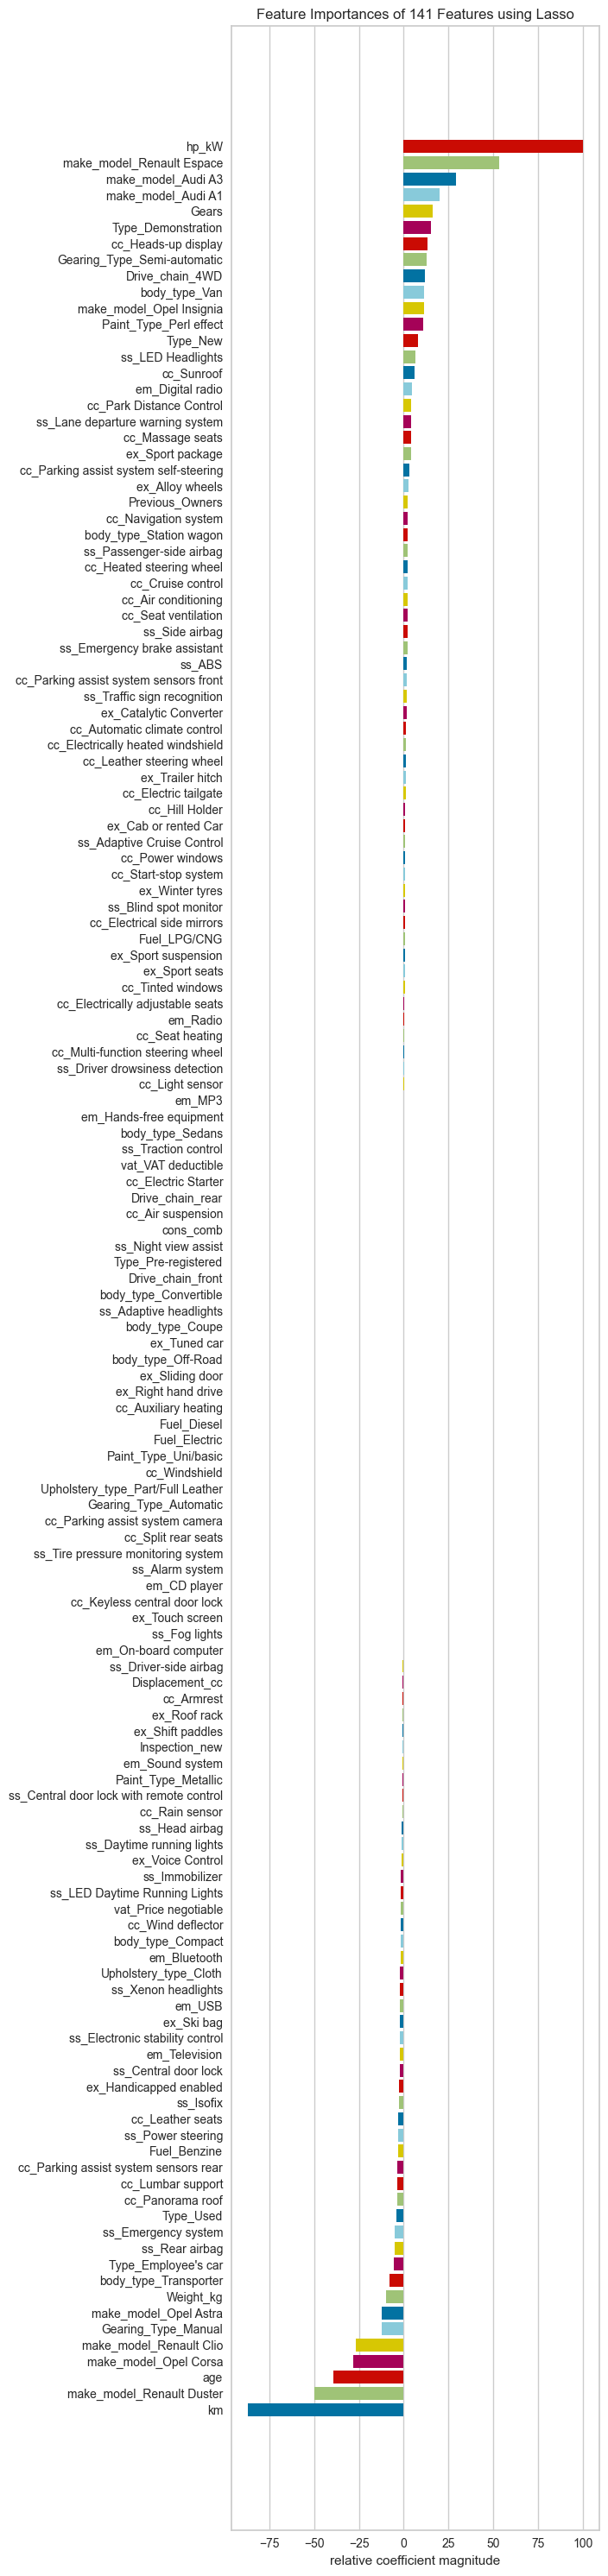

In [154]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=1.02)

viz = FeatureImportances(model, labels=X_train.columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

In [155]:
df_new = df3[["make_model", "hp_kW", "km","age", "price", "Gearing_Type", "Gears"]]

In [156]:
df_new

,make_model,hp_kW,km,age,price,Gearing_Type,Gears
0,Audi A1,66.000,56013.000,3.000,15770,Automatic,7.000
1,Audi A1,141.000,80000.000,2.000,14500,Automatic,7.000
2,Audi A1,85.000,83450.000,3.000,14640,Automatic,7.000
3,Audi A1,66.000,73000.000,3.000,14500,Automatic,6.000
4,Audi A1,66.000,16200.000,3.000,16790,Automatic,7.000
...,...,...,...,...,...,...,...
15490,Renault Espace,147.000,1647.363,0.000,39950,Automatic,6.000
15491,Renault Espace,165.000,9900.000,0.000,39885,Automatic,7.000
15492,Renault Espace,146.000,15.000,0.000,39875,Automatic,6.000
15493,Renault Espace,147.000,10.000,0.000,39700,Automatic,6.000


In [157]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [159]:
X_train, X_test = trans_2(X_train, X_test)

In [160]:
X_train

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,hp_kW,km,age,Gears
9866,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66.000,10.000,0.000,6.000
3430,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,81.000,54000.000,3.000,7.000
3756,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,110.000,39246.000,2.000,7.000
103,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,85.000,9082.000,1.000,7.000
9753,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66.000,10.000,0.000,6.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,100.000,47000.000,1.000,6.000
8006,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,77.000,10.000,0.000,5.000
1361,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,70.000,26650.000,1.000,5.000
1547,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,70.000,15577.000,1.000,5.000


In [161]:
X_test

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,hp_kW,km,age,Gears
9624,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,51.000,24487.000,1.000,5.000
14184,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,56.000,500.000,0.000,5.000
12919,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,87.000,24473.000,1.000,6.000
6448,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,81.000,70000.000,3.000,6.000
1472,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,70.000,24336.000,1.000,5.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7363,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,77.000,11500.000,1.000,5.000
4342,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,85.000,14270.000,1.000,7.000
551,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,66.000,57000.000,3.000,5.000
10447,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,101.000,94220.000,3.000,6.000


In [162]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [163]:
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.874,0.869
mae,1707.784,1682.861
mse,5848242.202,5590499.346
rmse,2418.314,2364.424


## Cross Validate

In [164]:
model = Lasso()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10)

In [165]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.874
test_neg_mean_absolute_error          -1710.374
test_neg_mean_squared_error        -5868070.271
test_neg_root_mean_squared_error      -2421.404
dtype: float64

## Gridsearch

In [166]:
lasso_model = Lasso()

param_grid = {'alpha':alpha_space}

lasso_final_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [167]:
lasso_final_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [168]:
lasso_final_model.best_params_

{'alpha': 0.01}

In [169]:
lasso_final_model.best_score_

-2421.2518388038307

In [170]:
train_val(lasso_final_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.874,0.869
mae,1709.112,1683.801
mse,5847490.840,5592442.063
rmse,2418.159,2364.834


In [171]:
2364/df_new.price.mean()

0.13448350739340834

In [172]:
y_pred = lasso_final_model.predict(X_test_scaled)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 7. Visually Compare Models Performance In a Graph

In [173]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.901,1481.413,2052.110
ridge_m,0.901,1481.154,2051.386
lasso_m,0.901,1481.389,2051.386
elastic_m,0.901,1481.389,2051.386
final_m,0.869,1683.801,2364.834


In [174]:
for i, j in enumerate(scores):
    print(i, j)

0 r2_score
1 mae
2 rmse


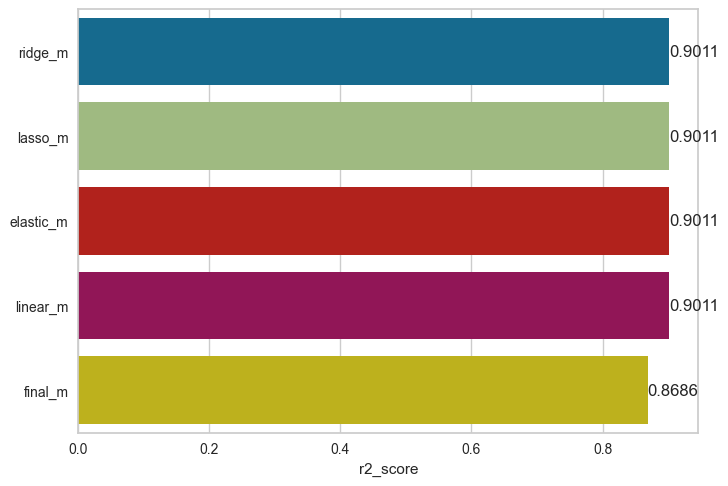

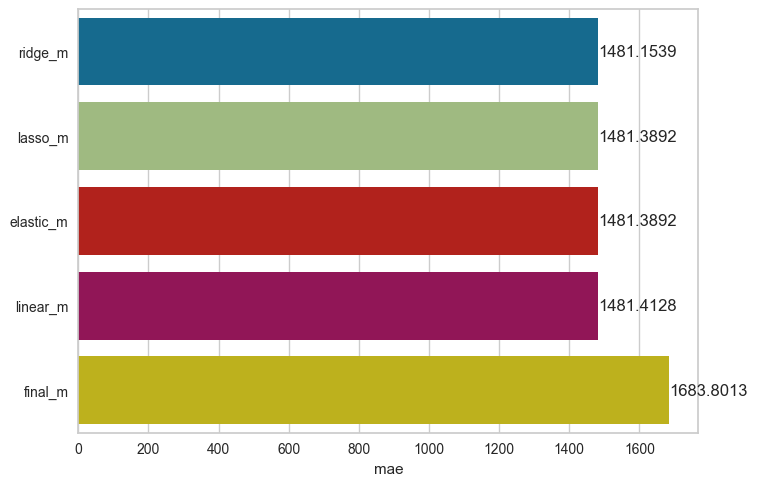

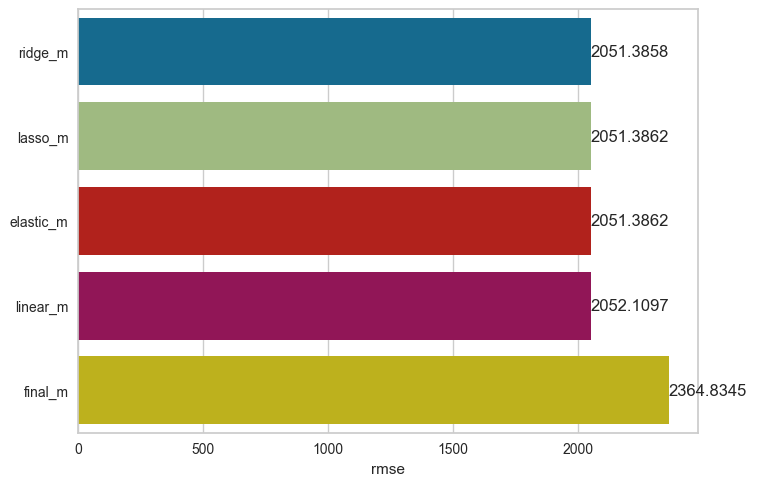

In [175]:
#metrics = scores.columns
for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    ax.bar_label(ax.containers[0], fmt="%.4f");

## Prediction new observation

In [176]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [177]:
X.head()

,make_model,hp_kW,km,age,Gearing_Type,Gears
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000
1,Audi A1,141.000,80000.000,2.000,Automatic,7.000
2,Audi A1,85.000,83450.000,3.000,Automatic,7.000
3,Audi A1,66.000,73000.000,3.000,Automatic,6.000
4,Audi A1,66.000,16200.000,3.000,Automatic,7.000


In [178]:
cat = X.select_dtypes("object").columns
cat = list(cat)
cat

['make_model', 'Gearing_Type']

In [179]:
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_cat = pd.DataFrame(enc.fit_transform(X[cat]), index = X.index, 
                           columns = enc.get_feature_names_out(cat))

X = X_cat.join(X)
X.drop(columns = cat, inplace=True)
X

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,hp_kW,km,age,Gears
0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66.000,56013.000,3.000,7.000
1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,141.000,80000.000,2.000,7.000
2,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,85.000,83450.000,3.000,7.000
3,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66.000,73000.000,3.000,6.000
4,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66.000,16200.000,3.000,7.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,147.000,1647.363,0.000,6.000
15491,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,165.000,9900.000,0.000,7.000
15492,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,146.000,15.000,0.000,6.000
15493,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,147.000,10.000,0.000,6.000


In [180]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [181]:
final_model = Lasso(alpha=0.01)

In [182]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)

In [183]:
my_dict = {
    "hp_kW": 66,
    "age": 2,
    "km": 17000,
    "Gears": 7,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"
}

In [184]:
new_obs = pd.DataFrame([my_dict])
new_obs

,hp_kW,age,km,Gears,make_model,Gearing_Type
0,66,2,17000,7,Audi A3,Automatic


In [185]:
onehot = pd.DataFrame(enc.transform(new_obs[cat]), index=new_obs.index,
                           columns = enc.get_feature_names_out(cat))
new_obs = onehot.join(new_obs)
new_obs.drop(columns = cat, inplace=True)
new_obs

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,hp_kW,age,km,Gears
0,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66,2,17000,7


In [186]:
new_obs = new_obs.reindex(columns=X.columns)
new_obs

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,hp_kW,km,age,Gears
0,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66,17000,2,7


In [187]:
new_obs = final_scaler.transform(new_obs)
new_obs

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.13065327, 0.05362776, 0.66666667, 0.66666667]])

In [188]:
final_model.predict(new_obs)

array([19532.1679574])

## Pipeline

In [189]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [190]:
cat = X.select_dtypes("object").columns
cat = list(cat)
cat

['make_model', 'Gearing_Type']

In [191]:
X.head(1)

,make_model,hp_kW,km,age,Gearing_Type,Gears
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000


In [192]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [193]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

operations = [("OneHotEncoder", column_trans), ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model',
                                                   'Gearing_Type'])])),
                ('Lasso', Lasso())])

In [194]:
my_dict = {
    "hp_kW": 66,
    "age": 2,
    "km": 17000,
    "Gears": 7,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"
    
}

In [195]:
new_obs = pd.DataFrame([my_dict])
new_obs

,hp_kW,age,km,Gears,make_model,Gearing_Type
0,66,2,17000,7,Audi A3,Automatic


In [196]:
pipe_model.predict(new_obs)

array([19532.47726492])

## Cross Validate With Pipeline

In [197]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [198]:
X.head()

,make_model,hp_kW,km,age,Gearing_Type,Gears
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000
1,Audi A1,141.000,80000.000,2.000,Automatic,7.000
2,Audi A1,85.000,83450.000,3.000,Automatic,7.000
3,Audi A1,66.000,73000.000,3.000,Automatic,6.000
4,Audi A1,66.000,16200.000,3.000,Automatic,7.000


In [199]:
cat = X.select_dtypes("object").columns
cat = list(cat)
cat

['make_model', 'Gearing_Type']

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [201]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

operations = [("OneHotEncoder", column_trans), ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model',
                                                   'Gearing_Type'])])),
                ('Lasso', Lasso())])

In [202]:
pipe_model.predict(new_obs)

array([19529.88233003])

In [203]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.874,0.869
mae,1707.784,1682.861
mse,5848242.202,5590499.346
rmse,2418.314,2364.424


In [204]:
operations = [("OneHotEncoder", column_trans), ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10)
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.874
test_neg_mean_absolute_error          -1710.422
test_neg_mean_squared_error        -5868226.511
test_neg_root_mean_squared_error      -2421.436
dtype: float64

In [205]:
df_new = df3[["make_model", "hp_kW", "km","age", "price", "Gearing_Type", "Gears"]]
df_new

,make_model,hp_kW,km,age,price,Gearing_Type,Gears
0,Audi A1,66.000,56013.000,3.000,15770,Automatic,7.000
1,Audi A1,141.000,80000.000,2.000,14500,Automatic,7.000
2,Audi A1,85.000,83450.000,3.000,14640,Automatic,7.000
3,Audi A1,66.000,73000.000,3.000,14500,Automatic,6.000
4,Audi A1,66.000,16200.000,3.000,16790,Automatic,7.000
...,...,...,...,...,...,...,...
15490,Renault Espace,147.000,1647.363,0.000,39950,Automatic,6.000
15491,Renault Espace,165.000,9900.000,0.000,39885,Automatic,7.000
15492,Renault Espace,146.000,15.000,0.000,39875,Automatic,6.000
15493,Renault Espace,147.000,10.000,0.000,39700,Automatic,6.000


In [206]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [207]:
cat = X.select_dtypes("object").columns
cat = list(cat)
cat

['make_model', 'Gearing_Type']

In [208]:
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_cat = pd.DataFrame(enc.fit_transform(X[cat]), index = X.index, 
                           columns = enc.get_feature_names_out(cat))

X = X_cat.join(X)
X.drop(columns = cat, inplace=True)
X

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,hp_kW,km,age,Gears
0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66.000,56013.000,3.000,7.000
1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,141.000,80000.000,2.000,7.000
2,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,85.000,83450.000,3.000,7.000
3,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66.000,73000.000,3.000,6.000
4,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66.000,16200.000,3.000,7.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,147.000,1647.363,0.000,6.000
15491,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,165.000,9900.000,0.000,7.000
15492,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,146.000,15.000,0.000,6.000
15493,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,147.000,10.000,0.000,6.000


In [209]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [210]:
X = X_scaled
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.76697161e-01, 1.00000000e+00, 6.66666667e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.52365931e-01, 6.66666667e-01, 6.66666667e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.63249211e-01, 1.00000000e+00, 6.66666667e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.73186120e-05, 0.00000000e+00, 3.33333333e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.15457413e-05, 0.00000000e+00, 3.33333333e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.19672747e-03, 0.00000000e+00, 3.33333333e-01]])

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [212]:
final_model = Lasso(alpha=0.01)

In [213]:
final_model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [214]:
y_pred = final_model.predict(X_test)

In [215]:
train_val(final_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.874,0.869
mae,1709.112,1683.801
mse,5847490.840,5592442.063
rmse,2418.159,2364.834


In [216]:
X = df_new.drop(columns = ["price"])
y = df_new.price

deployment

In [217]:
cat = X.select_dtypes("object").columns
cat = list(cat)
cat

['make_model', 'Gearing_Type']

In [218]:
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_cat = pd.DataFrame(enc.fit_transform(X[cat]), index = X.index, 
                           columns = enc.get_feature_names_out(cat))

X = X_cat.join(X)
X.drop(columns = cat, inplace=True)
X

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,hp_kW,km,age,Gears
0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66.000,56013.000,3.000,7.000
1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,141.000,80000.000,2.000,7.000
2,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,85.000,83450.000,3.000,7.000
3,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66.000,73000.000,3.000,6.000
4,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66.000,16200.000,3.000,7.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,147.000,1647.363,0.000,6.000
15491,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,165.000,9900.000,0.000,7.000
15492,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,146.000,15.000,0.000,6.000
15493,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,147.000,10.000,0.000,6.000


In [219]:
X.columns

Index(['make_model_Audi A1', 'make_model_Audi A3', 'make_model_Opel Astra',
       'make_model_Opel Corsa', 'make_model_Opel Insignia',
       'make_model_Renault Clio', 'make_model_Renault Duster',
       'make_model_Renault Espace', 'Gearing_Type_Automatic',
       'Gearing_Type_Manual', 'Gearing_Type_Semi-automatic', 'hp_kW', 'km',
       'age', 'Gears'],
      dtype='object')

In [220]:
columns_name = X.columns

In [221]:
import pickle
pickle.dump(columns_name, open("columns", 'wb'))

In [222]:
final_scaler = MinMaxScaler()

In [223]:
final_scaler.fit(X)

MinMaxScaler()

In [224]:
import pickle
pickle.dump(final_scaler, open("final_scale", 'wb'))

In [225]:
lasso_final_model = Lasso(alpha=0.01)

In [226]:
lasso_final_model.fit(X,y)

Lasso(alpha=0.01)

In [227]:
pickle.dump(lasso_final_model, open("final_model", 'wb'))

In [228]:
coder_model = pickle.load(open('final_model','rb'))

In [229]:
my_dict = {
    "hp_kW": 81,
    "age": 1,
    "km": 10000,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic",
    "Gears": 7
}

In [230]:
df = pd.DataFrame([my_dict])
df

,hp_kW,age,km,make_model,Gearing_Type,Gears
0,81,1,10000,Audi A3,Automatic,7


In [231]:
df = pd.get_dummies(df)
df

,hp_kW,age,km,Gears,make_model_Audi A3,Gearing_Type_Automatic
0,81,1,10000,7,1,1


In [232]:
df = df.reindex(columns=columns_name, fill_value=0)
df

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,hp_kW,km,age,Gears
0,0,1,0,0,0,0,0,0,1,0,0,81,10000,1,7


In [233]:
df = final_scaler.transform(df)

In [234]:
prediction = coder_model.predict(df)

In [235]:
print(prediction)

[13387.28358754]


In [236]:
print("your car's estimated price is $ {}.".format(int(prediction[0])))

your car's estimated price is $ 13387.


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___